## This notebook make scatterplots 
### based on data from res/[algo]/eval-[data].pkl"

Six scatter plots are made:
1. average f1 change when varying q & algo
2. average f1 change when varying q & data
3. average precision change when varying q & algo
4. average precision change when varying q & data
5. average recall change when varying q & algo
6. average recall change when varying q & data


In [1]:
import os, sys, argparse
import pandas as pd
import numpy as np

import pickle
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
parser = argparse.ArgumentParser(description='heatmap creator')
parser.add_argument('-o', '--output', type=str, default='-', action='store', help='target')
parser.add_argument('-d', '--data', type=str, default='alpha', choices=['alpha', 'amazon', 'epinions', 'otc'], help='data name')
parser.add_argument('-a', '--alg', type=str, default='bad', choices=['bn', 'feagle', 'fraudar', 'trust', 'rsd', 'bad'], help='alg name')

if bool(getattr(sys, 'ps1', sys.flags.interactive)):
    from tqdm import tqdm_notebook as tqdm
    print('interactive mode')
    parsed = parser.parse_args(['--data', 'alpha', '--alg', 'bn'])
else:
    from tqdm import tqdm
    print('script mode')
    parsed = parser.parse_args(sys.argv[1:])
    display=print

print(parsed)

interactive mode
Namespace(alg='bn', data='alpha', output='-')


In [140]:
# alg_list = ['bn', 'feagle', 'fraudar', 'trust', 'rsd', 'bad', 'rev2']
alg_list = ['rev2', 'bad', 'bn', 'trust', 'feagle', 'fraudar', 'rsd']
# data_list = ['alpha', 'amazon', 'epinions', 'otc']
data_list = ['otc', 'alpha', 'epinions', 'amazon']
q_range = np.array([0.005, 0.01, 0.03, 0.05, 0.1])
met_list = ['f1', 'prec', 'recl']

k_range = np.arange(10) / 10
n_range = list(range(0, 51, 5))
n_range[0] = 1

In [50]:
eval_path = '../res/%s/eval-%s.pkl' %(alg_list[1], 'epinions')      
with open(eval_path, 'rb') as fp:
    metrics_dict = pickle.load(fp)
print(metrics_dict)

{(0, 1, 0): None, (0, 1, 1): {'prec': {0.005: 1.0, 0.01: 1.0, 0.03: 0.5, 0.05: 0.5, 0.1: 0.25}, 'recl': {0.005: 1.0, 0.01: 1.0, 0.03: 1.0, 0.05: 1.0, 0.1: 1.0}, 'f1': {0.005: 1.0, 0.01: 1.0, 0.03: 0.6666666666666666, 0.05: 0.6666666666666666, 0.1: 0.4}}, (0, 1, 2): {'prec': {0.005: 1.0, 0.01: 0.5, 0.03: 0.16666666666666666, 0.05: 0.1, 0.1: 0.05263157894736842}, 'recl': {0.005: 1.0, 0.01: 1.0, 0.03: 1.0, 0.05: 1.0, 0.1: 1.0}, 'f1': {0.005: 1.0, 0.01: 0.6666666666666666, 0.03: 0.2857142857142857, 0.05: 0.18181818181818182, 0.1: 0.1}}, (0, 1, 3): {'prec': {0.005: 0.0, 0.01: 0.5, 0.03: 0.25, 0.05: 0.16666666666666666, 0.1: 0.09090909090909091}, 'recl': {0.005: 0.0, 0.01: 0.5, 0.03: 0.5, 0.05: 0.5, 0.1: 0.5}, 'f1': {0.005: 0.0, 0.01: 0.5, 0.03: 0.3333333333333333, 0.05: 0.25, 0.1: 0.15384615384615385}}, (0, 1, 4): {'prec': {0.005: 0.5, 0.01: 0.3333333333333333, 0.03: 0.14285714285714285, 0.05: 0.08333333333333333, 0.1: 0.043478260869565216}, 'recl': {0.005: 1.0, 0.01: 1.0, 0.03: 1.0, 0.05: 

In [141]:
from collections import defaultdict

data_list = ['otc','alpha','epinions','amazon']
alg_list = ['rev2', 'bad', 'bn', 'trust', 'feagle', 'fraudar', 'rsd']
markers = ["o", "v", "8", "s", "P", "*", "+"]

def compute_uchange():     #fig, ax, plot_data, title=''
    
    u_change_dict = {}     #u_change_dict[alg_id][met][q] = average_uchange = sum of u_change / # of valid dataset
    
    for alg_id in range(len(alg_list)): 
        u_change_dict[alg_id] = {}     
        for met in met_list:
            u_change_dict[alg_id][met] = {}
            
        for data in data_list:         
            eval_path = '../res/%s/eval-%s.pkl' %(alg_list[alg_id], data)                            
            try:
                with open(eval_path, 'rb') as fp:
                    metrics_dict = pickle.load(fp)
            except FileNotFoundError:
                print("no ../res/%s/eval-%s.pkl" %(alg_list[alg_id], data))
                continue
            
            print(alg_list[alg_id], data)
            
            
            q_dict = {}
            for q in range(5):
                heat_dict = {'f1': np.zeros([10, 11]), 'prec': np.zeros([10, 11]), 'recl': np.zeros([10, 11])}
                
#                 try:
                for k, n in itertools.product(range(10), range(11)):
                    for ind in range(50):
                        if metrics_dict[(k, n_range[n], ind)] is not None:
                            heat_dict['f1'][k, n] += metrics_dict[(k, n_range[n], ind)]['f1'][q_range[q]]
                            heat_dict['prec'][k, n] += metrics_dict[(k, n_range[n], ind)]['prec'][q_range[q]]
                            heat_dict['recl'][k, n]  += metrics_dict[(k, n_range[n], ind)]['recl'][q_range[q]] 

                    heat_dict['f1'][k, n] /= 50
                    heat_dict['prec'][k, n] /= 50
                    heat_dict['recl'][k, n] /= 50
                    
#                     heat_dict['f1'][k, n] = np.mean([metrics_dict[(k, n_range[n], ind)]['f1'][q_range[q]] for ind in range(50)])
#                     heat_dict['prec'][k, n] = np.mean([metrics_dict[(k, n_range[n], ind)]['prec'][q_range[q]] for ind in range(50)])
#                     heat_dict['recl'][k, n] = np.mean([metrics_dict[(k, n_range[n], ind)]['recl'][q_range[q]] for ind in range(50)])
                q_dict[q] = heat_dict   
#                 except (TypeError): #, NameError):
#                     print("HERE !!!!!!")
#                     q_dict[q] = heat_dict
#                     pass
            
            for q in range(5):  
                for met in met_list:
                    try:
                        # div = 0
                        u_new = q_dict[q][met][1:, :].min()
                        u_old = q_dict[q][met][0, :].mean()

#                        k_new, n_new = np.unravel_index(q_dict[q][met][1:, :].argmin(), q_dict[q][met][1:, :].shape)                
#                        k_new += 1

                        u_change = (u_new - u_old) / u_old
                        print(u_change)
                        u_change_dict[alg_id][met][q] = u_change_dict[alg_id][met].get(q, 0) + 1/4 * u_change
                        # div += 1
               
                    except KeyError:
                        # div -= 1
                        pass
                    
#                     try:
#                         u_change_dict[alg_id][met][q] /= 4
#                     except KeyError:
#                         pass
                        
                     
    return u_change_dict
    
u_change_dict = compute_uchange()


no ../res/rev2/eval-otc.pkl
rev2 alpha
-0.7805701969570514
0.0
-0.8633215991876347
-0.7805701969570514
0.0
-0.8633215991876347
-0.7750900523898792
-0.06400000000000006
-0.8600886000864106
-0.7680775471166095
-0.17000000000000015
-0.8551048715880377
-0.7346678812192894
-0.2208581349206352
-0.8338347085753574
no ../res/rev2/eval-epinions.pkl
no ../res/rev2/eval-amazon.pkl
bad otc
-0.6973211425986736
-0.09374999999999993
-0.8088881967922332
-0.6969260521910963
-0.10416666666666666
-0.8086664877853048
-0.6807732415250476
-0.046874999999999875
-0.7994206276997767
-0.6418989788721339
-0.01612903225806453
-0.7755488710448691
-0.5017601249642892
0.10077639751552805
-0.6731668445210506
bad alpha
-0.7545594742085155
1.5419764230904954e-16
-0.8355208691990211
-0.7545594742085155
1.5419764230904954e-16
-0.8355208691990211
-0.749017370613139
-0.027777777777777655
-0.831758330998657
-0.6946860379598058
-0.11111111111111092
-0.7953155369592142
-0.6240029435562655
-0.03186274509803898
-0.7476497086862

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


fraudar otc
-0.7602752639517344
0.0
-0.850925925925926
-0.7602752639517344
0.0
-0.850925925925926
-0.7591678442396637
0.0
-0.8503333333333334
-0.7386855103557095
0.0
-0.839091393762371
-0.5882480912163335
-0.006666666666666904
-0.7433613736503781
fraudar alpha
-0.8001343546456329
-2.3129646346357425e-16
-0.880192267406711
-0.7986577950295384
-2.3129646346357425e-16
-0.8793915200425044
-0.7903220873261314
-0.01333333333333342
-0.874015222002104
-0.7442470883679615
0.02666666666666684
-0.8450571513214228
-0.7037726039697413
-0.10997304582210259
-0.8118238023887987
fraudar epinions
-0.9936443828932673
-0.6864836043721674
-0.995778102189781
-0.9646609999326021
-0.2669444444444444
-0.9812395447468095
-0.9631690563675874
-0.3127605082466146
-0.9887423861057756
-0.9269428924758818
-0.17545749196213925
-0.984079241563829
-0.7681250136374614
0.007400266326152949
-0.9715498817413042
fraudar amazon
-0.9566069942127795
-0.34703196347031967
-0.9771331401194884
-0.9496137866941342
-0.095890410958904

In [78]:
# for i in range(6):
#     print(alg_list[i])
#     print(u_change_dict[i])
# u_change_dict[alg_id][met]
alg_list = ['rev2', 'bad', 'bn', 'trust', 'feagle', 'fraudar', 'rsd']
u_change_dict = compute_uchange()
print(u_change_dict[1])

# print(alg_list[1])
# print(q_range)

no ../res/rev2/eval-otc.pkl
rev2 alpha
-0.7805701969570514
0.0
-0.8633215991876347
-0.7805701969570514
0.0
-0.8633215991876347
-0.7750900523898792
-0.06400000000000006
-0.8600886000864106
-0.7680775471166095
-0.17000000000000015
-0.8551048715880377
-0.7346678812192894
-0.2208581349206352
-0.8338347085753574
no ../res/rev2/eval-epinions.pkl
no ../res/rev2/eval-amazon.pkl
bad otc
-0.6973211425986736
-0.09374999999999993
-0.8088881967922332
-0.6969260521910963
-0.10416666666666666
-0.8086664877853048
-0.6807732415250476
-0.046874999999999875
-0.7994206276997767
-0.6418989788721339
-0.01612903225806453
-0.7755488710448691
-0.5017601249642892
0.10077639751552805
-0.6731668445210506
bad alpha
-0.7545594742085155
1.5419764230904954e-16
-0.8355208691990211
-0.7545594742085155
1.5419764230904954e-16
-0.8355208691990211
-0.749017370613139
-0.027777777777777655
-0.831758330998657
-0.6946860379598058
-0.11111111111111092
-0.7953155369592142
-0.6240029435562655
-0.03186274509803898
-0.7476497086862

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


fraudar alpha
-0.8001343546456329
-2.3129646346357425e-16
-0.880192267406711
-0.7986577950295384
-2.3129646346357425e-16
-0.8793915200425044
-0.7903220873261314
-0.01333333333333342
-0.874015222002104
-0.7442470883679615
0.02666666666666684
-0.8450571513214228
-0.7037726039697413
-0.10997304582210259
-0.8118238023887987
fraudar epinions
-0.9936443828932673
-0.6864836043721674
-0.995778102189781
-0.9646609999326021
-0.2669444444444444
-0.9812395447468095
-0.9631690563675874
-0.3127605082466146
-0.9887423861057756
-0.9269428924758818
-0.17545749196213925
-0.984079241563829
-0.7681250136374614
0.007400266326152949
-0.9715498817413042
fraudar amazon
-0.9566069942127795
-0.34703196347031967
-0.9771331401194884
-0.9496137866941342
-0.0958904109589041
-0.9735127093569975
-0.8816572189212607
0.07397849462365608
-0.9361131963904687
-0.816665842106612
0.3532793269979748
-0.9008388543410075
-0.6283393036703532
0.24878143887697413
-0.7987400946838348
rsd otc
-0.6149456216386302
0.6296296296296295


no ../res/rev2/eval-otc.pkl
rev2 alpha
-0.7805701969570514
0.0
-0.8633215991876347
-0.7805701969570514
0.0
-0.8633215991876347
-0.7750900523898792
-0.06400000000000006
-0.8600886000864106
-0.7680775471166095
-0.17000000000000015
-0.8551048715880377
-0.7346678812192894
-0.2208581349206352
-0.8338347085753574
no ../res/rev2/eval-epinions.pkl
no ../res/rev2/eval-amazon.pkl
bad otc
-0.6973211425986736
-0.09374999999999993
-0.8088881967922332
-0.6969260521910963
-0.10416666666666666
-0.8086664877853048
-0.6807732415250476
-0.046874999999999875
-0.7994206276997767
-0.6418989788721339
-0.01612903225806453
-0.7755488710448691
-0.5017601249642892
0.10077639751552805
-0.6731668445210506
bad alpha
-0.7545594742085155
1.5419764230904954e-16
-0.8355208691990211
-0.7545594742085155
1.5419764230904954e-16
-0.8355208691990211
-0.749017370613139
-0.027777777777777655
-0.831758330998657
-0.6946860379598058
-0.11111111111111092
-0.7953155369592142
-0.6240029435562655
-0.03186274509803898
-0.7476497086862

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


-0.7602752639517344
0.0
-0.850925925925926
-0.7602752639517344
0.0
-0.850925925925926
-0.7591678442396637
0.0
-0.8503333333333334
-0.7386855103557095
0.0
-0.839091393762371
-0.5882480912163335
-0.006666666666666904
-0.7433613736503781
fraudar alpha
-0.8001343546456329
-2.3129646346357425e-16
-0.880192267406711
-0.7986577950295384
-2.3129646346357425e-16
-0.8793915200425044
-0.7903220873261314
-0.01333333333333342
-0.874015222002104
-0.7442470883679615
0.02666666666666684
-0.8450571513214228
-0.7037726039697413
-0.10997304582210259
-0.8118238023887987
fraudar epinions
-0.9936443828932673
-0.6864836043721674
-0.995778102189781
-0.9646609999326021
-0.2669444444444444
-0.9812395447468095
-0.9631690563675874
-0.3127605082466146
-0.9887423861057756
-0.9269428924758818
-0.17545749196213925
-0.984079241563829
-0.7681250136374614
0.007400266326152949
-0.9715498817413042
fraudar amazon
-0.9566069942127795
-0.34703196347031967
-0.9771331401194884
-0.9496137866941342
-0.0958904109589041
-0.9735127

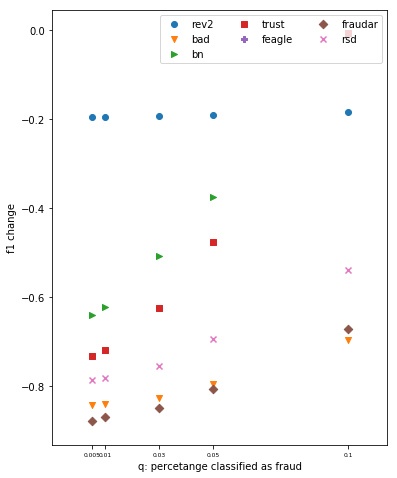

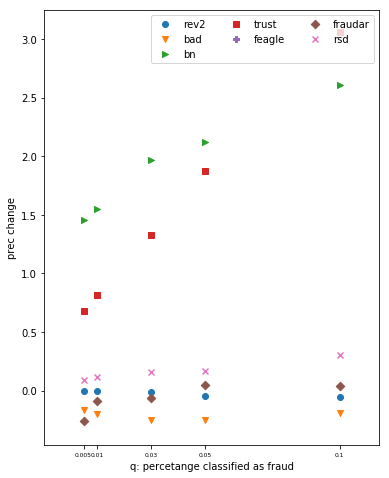

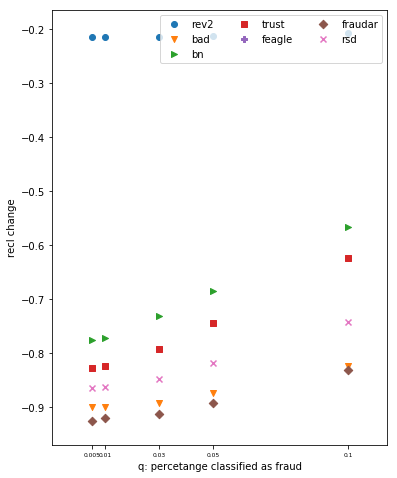

In [142]:
markers = ["o", "v", ">", "s", "P", "D", "x"]
def plot_scatters():
    
    u_change_dict = compute_uchange() 
    
    for i in range(3):        # ['f1', 'prec', 'recl']
        fig = plt.figure(i + 1, figsize=(6,8))     
        ax = fig.add_subplot(111)
        lines = []
        met = met_list[i]
        for alg_id in range(len(alg_list)):
        
            ax.scatter(q_range,  list(u_change_dict[alg_id][met].values()), 
                                       marker= markers[alg_id], label= alg_list[alg_id]) 
#            ax.set_yticks([i * 0.1 - 1 for i in range(20)]) # -0.6, -0.4,-1.0, -0.8,, 0.6, 0.8, 1.0])
#            ax.set_yticklabels([i * 0.1 - 1 for i in range(20)]) #-0.6, -0.4,,-1.0, -0.8,, 0.6, 0.8, 1.0])

            ax.set_xticks(q_range)
            ax.set_xticklabels(q_range, fontsize= 6)

            ax.set_xlabel('q: percetange classified as fraud')
            ax.set_ylabel('%s change' %met)
            
        ax.legend(
                loc='upper right',
                ncol=3,
                fontsize=10)
        
        fig.savefig('../res/scatter_alg_%s.pdf' %(met_list[i]))
        
        

plot_scatters()

# #plot_scatterplots('bn', 'otc')
# #plot_scatterplots('bn', 'amazon')
# # plot_scatterplots('bn', 'epinions')
# # plot_scatterplots('rsd', 'epinions')
# #plot_scatterplots('fraudar', 'alpha')

In [97]:
eval_path = '../res/%s/eval-%s.pkl' %('bn', 'epinions')
with open(eval_path, 'rb') as fp:
    metrics_dict = pickle.load(fp)
metrics_dict


{(0,
  1,
  0): {'prec': {0.005: 0.0,
   0.01: 0.0,
   0.03: 0.3333333333333333,
   0.05: 0.2,
   0.1: 0.1111111111111111}, 'recl': {0.005: 0.0,
   0.01: 0.0,
   0.03: 1.0,
   0.05: 1.0,
   0.1: 1.0}, 'f1': {0.005: 0.0,
   0.01: 0.0,
   0.03: 0.5,
   0.05: 0.33333333333333337,
   0.1: 0.19999999999999998}},
 (0, 1, 1): {'prec': {0.005: 1.0, 0.01: 1.0, 0.03: 0.5, 0.05: 0.5, 0.1: 0.25},
  'recl': {0.005: 1.0, 0.01: 1.0, 0.03: 1.0, 0.05: 1.0, 0.1: 1.0},
  'f1': {0.005: 1.0,
   0.01: 1.0,
   0.03: 0.6666666666666666,
   0.05: 0.6666666666666666,
   0.1: 0.4}},
 (0,
  1,
  2): {'prec': {0.005: 0.0,
   0.01: 0.0,
   0.03: 0.16666666666666666,
   0.05: 0.1,
   0.1: 0.05263157894736842}, 'recl': {0.005: 0.0,
   0.01: 0.0,
   0.03: 1.0,
   0.05: 1.0,
   0.1: 1.0}, 'f1': {0.005: 0.0,
   0.01: 0.0,
   0.03: 0.2857142857142857,
   0.05: 0.18181818181818182,
   0.1: 0.1}},
 (0,
  1,
  3): {'prec': {0.005: 1.0,
   0.01: 0.5,
   0.03: 0.25,
   0.05: 0.16666666666666666,
   0.1: 0.09090909090909091}, 

In [135]:
from collections import defaultdict

data_list = ['otc','alpha','epinions','amazon']
alg_list = ['rev2', 'bad', 'bn', 'trust', 'feagle', 'fraudar', 'rsd']

def compute_uchange():     #fig, ax, plot_data, title=''
    
    u_change_dict = {}     #u_change_dict[data_id][met][q] = average_uchange = sum of u_change / # of valid_alg (7)
    
    for data_id in range(len(data_list)): 
        u_change_dict[data_id] = {}     
        for met in met_list:
            u_change_dict[data_id][met] = {}
            
        for alg in ['feagle']: #alg_list:         
            eval_path = '../res/%s/eval-%s.pkl' %(alg, data_list[data_id])                            
            try:
                with open(eval_path, 'rb') as fp:
                    metrics_dict = pickle.load(fp)
            except FileNotFoundError:
                print("no ../res/%s/eval-%s.pkl" %(alg, data_list[data_id]))
                continue
            
            print(alg, data_list[data_id])
            
            q_dict = {}
            for q in range(5):
                heat_dict = {'f1': np.zeros([10, 11]), 'prec': np.zeros([10, 11]), 'recl': np.zeros([10, 11])}
                
                for k, n in itertools.product(range(10), range(11)):
                    for ind in range(50):
                        if metrics_dict[(k, n_range[n], ind)] is not None:
                            heat_dict['f1'][k, n] += metrics_dict[(k, n_range[n], ind)]['f1'][q_range[q]]
                            heat_dict['prec'][k, n] += metrics_dict[(k, n_range[n], ind)]['prec'][q_range[q]]
                            heat_dict['recl'][k, n]  += metrics_dict[(k, n_range[n], ind)]['recl'][q_range[q]] 
                            
                    heat_dict['f1'][k, n] /= 50
                    heat_dict['prec'][k, n] /= 50
                    heat_dict['recl'][k, n] /= 50
                    
                q_dict[q] = heat_dict
            
            for q in range(5):  
                for met in met_list:
                    #try:

                    u_new = q_dict[q][met][1:, :].min()
                    u_old = q_dict[q][met][0, :].mean()
                    print(u_new, u_old)

#                        k_new, n_new = np.unravel_index(q_dict[q][met][1:, :].argmin(), q_dict[q][met][1:, :].shape)                
#                        k_new += 1
                    if u_old is not 0:
                        u_change = (u_new - u_old) / u_old
                    else:
                        u_change = 0

                    u_change_dict[data_id][met][q] = u_change_dict[data_id][met].get(q, 0) + 1/7 * u_change
                   
                            
    return u_change_dict
    

u_change_dict = compute_uchange()
# print(u_change_dict[0])
# print(u_change_dict[1])
print(u_change_dict[2])
# print(u_change_dict[3])

feagle otc
0.15635115187348006 0.4243809523809523
0
0.78 0.5199999999999999
0
0.091492722126792 0.39388888888888884
0
0.1563474314185638 0.4243809523809523
0
0.775 0.5199999999999999
0
0.091492722126792 0.39388888888888884
0
0.16185230945468 0.4243809523809523
0
0.768 0.5199999999999999
0
0.09441525791844371 0.39388888888888884
0
0.17709508904640248 0.42971428571428566
0
0.7575 0.5199999999999999
0
0.10297861442352488 0.3988888888888889
0
0.242440019893972 0.4398124098124098
0
0.7647142857142858 0.5183333333333334
0
0.1433318012179529 0.40844444444444433
0
feagle alpha
0.12318635737864807 0.3314285714285714
0
0.62 0.46
0
0.07131456997460793 0.2873333333333333
0
0.12318635737864807 0.3314285714285714
0
0.62 0.46
0
0.07131456997460793 0.2873333333333333
0
0.12613972472689366 0.3314285714285714
0
0.63 0.46
0
0.07293115068731489 0.2873333333333333
0
0.14566197836278974 0.3314285714285714
0
0.62 0.46
0
0.08402840421506032 0.2873333333333333
0
0.2012417544062193 0.35433333333333333
0
0.63 0.

/Users/pennyliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


no ../res/rev2/eval-otc.pkl
bad otc
bn otc
trust otc
feagle otc
fraudar otc
rsd otc
rev2 alpha
bad alpha
bn alpha
trust alpha
feagle alpha
fraudar alpha
rsd alpha
no ../res/rev2/eval-epinions.pkl
bad epinions
bn epinions
trust epinions
feagle epinions
fraudar epinions
rsd epinions
no ../res/rev2/eval-amazon.pkl


/Users/pennyliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


bad amazon
bn amazon
trust amazon
feagle amazon
fraudar amazon
rsd amazon


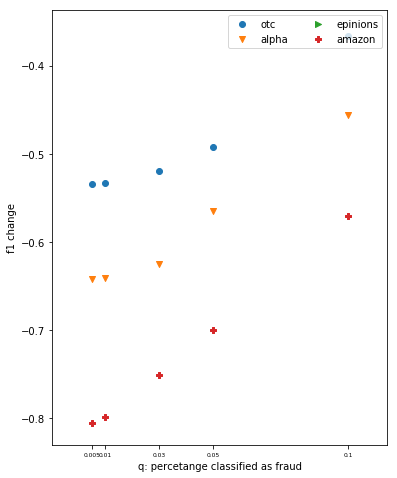

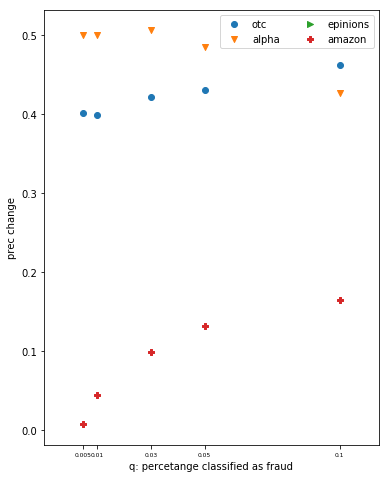

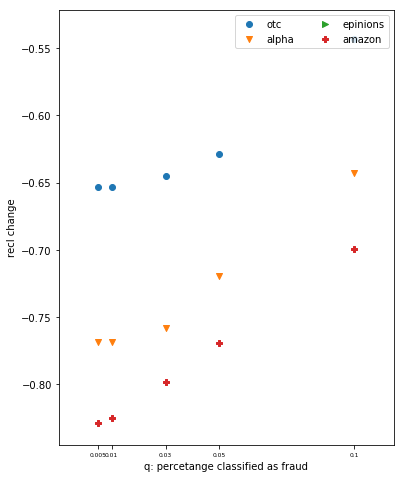

In [95]:
markers = ["o", "v", ">", "P"]   #markers for 4 datasets , "s", "D", "x"]
def plot_scatters():
    
    u_change_dict = compute_uchange() 
    
    for i in range(3):        # ['f1', 'prec', 'recl']
        fig = plt.figure(i + 1, figsize=(6,8))     
        ax = fig.add_subplot(111)
        met = met_list[i]
        
        for data_id in range(len(data_list)):
            u_change_list = list(u_change_dict[data_id][met].values())
#            print(u_change_list)
            if(len(u_change_list) != 5):
                print("%s not 5 values" %data_list[data_id])
                continue
            
            
            ax.scatter(q_range,  u_change_list, 
                                       marker= markers[data_id], label= data_list[data_id]) 
#             ax.set_yticks([round(i * 0.1 - 1, 2) for i in range(20)]) # -0.6, -0.4,-1.0, -0.8,, 0.6, 0.8, 1.0])
#             ax.set_yticklabels([round(i * 0.1 - 1, 2) for i in range(20)])

            ax.set_xticks(q_range)
            ax.set_xticklabels(q_range, fontsize=6)

            ax.set_xlabel('q: percetange classified as fraud')
            ax.set_ylabel('%s change' %met)
            
        ax.legend(
                loc='upper right',
                ncol=2,
                fontsize=10)
        
        fig.savefig('../res/scatter_data_%s.pdf' %(met_list[i]))
        

plot_scatters()

In [13]:
reports = {met: {q: {alg: {data: {} for data in data_list} for alg in alg_list} for q in q_range} for met in met_list}

for alg in alg_list:
        for met in met_list:
            for q in range(5):
                print(alg, met, q_range[q], u_change_dict[alg][met][q])
        
        

KeyError: 'rev2'